# 3 Machine Learning for Classification

We'll use logistic regression to predict churn

## 3.1 Chrun prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn

## 3.2 Data preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [2]:
file = 'data-week-3.csv '
if os.path.exists(file):
    pass
else:
    data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
    !wget $data -O data-week-3.csv  
    

--2025-10-13 15:21:50--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.02s   

2025-10-13 15:21:51 (37.7 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [3]:
df = pd.read_csv("data-week-3.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [5]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.T

0             1               2     \
customerid              7590-vhveg    5575-gnvde      3668-qpybk   
gender                      female          male            male   
seniorcitizen                    0             0               0   
partner                        yes            no              no   
dependents                      no            no              no   
tenure                           1            34               2   
phoneservice                    no           yes             yes   
multiplelines     no_phone_service            no              no   
internetservice                dsl           dsl             dsl   
onlinesecurity                  no           yes             yes   
onlinebackup                   yes            no             yes   
deviceprotection                no           yes              no   
techsupport                     no            no              no   
streamingtv                     no            no              no   
streamingmovies                 no            no              no   
contract            month-to-month      one_year  month-to-month   
paperlessbilling               yes            no             yes   
paymentmethod     electronic_check  mailed_check    mailed_check   
monthlycharges               29.85         56.95           53.85   
totalcharges                 29.85        1889.5          108.15   
churn                           no            no             yes   

                                       3                 4     \
customerid                       7795-cfocw        9237-hqitu   
gender                                 male            female   
seniorcitizen                             0                 0   
partner                                  no                no   
dependents                               no                no   
tenure                                   45                 2   
phoneservice                             no               yes   
multiplelines              no_phone_service                no   
internetservice                         dsl       fiber_optic   
onlinesecurity                          yes                no   
onlinebackup                             no                no   
deviceprotection                        yes                no   
techsupport                             yes                no   
streamingtv                              no                no   
streamingmovies                          no                no   
contract                           one_year    month-to-month   
paperlessbilling                         no               yes   
paymentmethod     bank_transfer_(automatic)  electronic_check   
monthlycharges                         42.3              70.7   
totalcharges                        1840.75            151.65   
churn                                    no               yes   

                              5                        6                 7     \
customerid              9305-cdskc               1452-kiovk        6713-okomc   
gender                      female                     male            female   
seniorcitizen                    0                        0                 0   
partner                         no                       no                no   
dependents                      no                      yes                no   
tenure                           8                       22                10   
phoneservice                   yes                      yes                no   
multiplelines                  yes                      yes  no_phone_service   
internetservice        fiber_optic              fiber_optic               dsl   
onlinesecurity                  no                       no               yes   
onlinebackup                    no                      yes                no   
deviceprotection               yes                       no                no   
techsupport                     no               

In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [8]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

df[tc.isnull()][['customerid', 'totalcharges']]

customerid totalcharges
488   4472-lvygi            _
753   3115-czmzd            _
936   5709-lvoeq            _
1082  4367-nuyao            _
1340  1371-dwpaz            _
3331  7644-omvmy            _
3826  3213-vvolg            _
4380  2520-sgtta            _
5218  2923-arzlg            _
6670  4075-wkniu            _
6754  2775-sefee            _

In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df.totalcharges = df.totalcharges.fillna(0)
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [11]:
df.churn = (df.churn == 'yes').astype(int)

In [12]:
df

customerid  gender  seniorcitizen partner dependents  tenure  \
0     7590-vhveg  female              0     yes         no       1   
1     5575-gnvde    male              0      no         no      34   
2     3668-qpybk    male              0      no         no       2   
3     7795-cfocw    male              0      no         no      45   
4     9237-hqitu  female              0      no         no       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-resvb    male              0     yes        yes      24   
7039  2234-xaduh  female              0     yes        yes      72   
7040  4801-jzazl  female              0     yes        yes      11   
7041  8361-ltmkd    male              1     yes         no       4   
7042  3186-ajiek    male              0      no         no      66   

     phoneservice     multiplelines internetservice onlinesecurity  ...  \
0              no  no_phone_service             dsl             no  ...   
1             yes                no             dsl            yes  ...   
2             yes                no             dsl            yes  ...   
3              no  no_phone_service             dsl            yes  ...   
4             yes                no     fiber_optic             no  ...   
...           ...               ...             ...            ...  ...   
7038          yes               yes             dsl            yes  ...   
7039          yes               yes     fiber_optic             no  ...   
7040           no  no_phone_service             dsl            yes  ...   
7041          yes               yes     fiber_optic             no  ...   
7042          yes                no     fiber_optic            yes  ...   

     deviceprotection techsupport streamingtv streamingmovies        contract  \
0                  no          no          no              no  month-to-month   
1                 yes          no          no              no        one_year   
2                  no          no          no              no  month-to-month   
3                 yes         yes          no              no        one_year   
4                  no          no          no              no  month-to-month   
...               ...         ...         ...             ...             ...   
7038              yes         yes         yes             yes        one_year   
7039              yes          no         yes             yes        one_year   
7040               no          no          no              no  month-to-month   
7041               no          no          no              no  month-to-month   
7042              yes         yes         yes             yes        two_year   

     paperlessbilling              paymentmethod monthlycharges  totalcharges  \
0                 yes           electronic_check          29.85         29.85   
1                  no               mailed_check          56.95       1889.50   
2                 yes               mailed_check          53.85        108.15   
3                  no  bank_transfer_(automatic)          42.30       1840.75   
4                 yes           electronic_check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              yes               mailed_check          84.80       1990.50   
7039              yes    credit_card_(automatic)         103.20       7362.90   
7040              yes           electronic_check          29.60        346.45   
7041              yes               mailed_check          74.40        306.60   
7042              yes  bank_transfer_(automatic)         105.65       6844.50   

      churn  
0         0  
1         0  
2         1  
3         0  
4         1  
...     ...  
7038      0  
7039      0  
7040      0  
7041      1  
7042      0  

[7043 rows x 21 columns]

## 3.3 Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [15]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [16]:
len(df_train), len(df_val), len(df_test), 

(4225, 1409, 1409)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [19]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 Exploratory Data Analysis (EDA)

* Check missing values
* Look at the target variable (churn)
* Look at the numerical and categorical variables

In [20]:
df_full_train = df_full_train.reset_index(drop=True)

In [21]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

#### Churn rate

In [22]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [23]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [24]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [25]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [26]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [27]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

* Churn rate
* Risk ratio
* Mutual information

#### Churn rate

In [28]:
df_full_train.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  5442-pptjy    male              0     yes        yes      12          yes   
1  6261-rcvns  female              0      no         no      42          yes   
2  2176-osjuv    male              0     yes         no      71          yes   
3  6161-erdgd    male              0     yes        yes      71          yes   
4  2364-ufrom    male              0      no         no      30          yes   

  multiplelines internetservice       onlinesecurity  ...  \
0            no              no  no_internet_service  ...   
1            no             dsl                  yes  ...   
2           yes             dsl                  yes  ...   
3           yes             dsl                  yes  ...   
4            no             dsl                  yes  ...   

      deviceprotection          techsupport          streamingtv  \
0  no_internet_service  no_internet_service  no_internet_service   
1                  yes                  yes                   no   
2                   no                  yes                   no   
3                  yes                  yes                  yes   
4                   no                  yes                  yes   

       streamingmovies  contract paperlessbilling              paymentmethod  \
0  no_internet_service  two_year               no               mailed_check   
1                  yes  one_year               no    credit_card_(automatic)   
2                   no  two_year               no  bank_transfer_(automatic)   
3                  yes  one_year               no           electronic_check   
4                   no  one_year               no           electronic_check   

  monthlycharges  totalcharges  churn  
0          19.70        258.35      0  
1          73.90       3160.55      1  
2          65.15       4681.75      0  
3          85.45       6300.85      0  
4          70.40       2044.75      0  

[5 rows x 21 columns]

In [29]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [30]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [31]:
global_churn_rate

np.float64(0.26996805111821087)

In [32]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [33]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [34]:
global_churn_rate - churn_partner

np.float64(0.06493474245795922)

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn_rate AS diff,
    AVG(churn) / global_churn_rate AS risk
FROM 
    data
GROUP BY
    gender; 
```

In [35]:
df_full_train.groupby('gender').churn.agg(['mean', 'count'])

mean  count
gender                 
female  0.276824   2796
male    0.263214   2838

In [36]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])

In [37]:
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate

In [38]:
df_group

mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980

In [39]:
from IPython.display import display

In [40]:
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    

mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980

mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208

mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472

mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651

mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412

mean  count      diff      risk
multiplelines                                        
no                0.257407   2700 -0.012561  0.953474
no_phone_service  0.241316    547 -0.028652  0.893870
yes               0.290742   2387  0.020773  1.076948

mean  count      diff      risk
internetservice                                     
dsl              0.192347   1934 -0.077621  0.712482
fiber_optic      0.425171   2479  0.155203  1.574895
no               0.077805   1221 -0.192163  0.288201

mean  count      diff      risk
onlinesecurity                                          
no                   0.420921   2801  0.150953  1.559152
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.153226   1612 -0.116742  0.567570

mean  count      diff      risk
onlinebackup                                            
no                   0.404323   2498  0.134355  1.497672
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.217232   1915 -0.052736  0.804660

mean  count      diff      risk
deviceprotection                                        
no                   0.395875   2473  0.125907  1.466379
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.230412   1940 -0.039556  0.853480

mean  count      diff      risk
techsupport                                             
no                   0.418914   2781  0.148946  1.551717
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.159926   1632 -0.110042  0.592390

mean  count      diff      risk
streamingtv                                             
no                   0.342832   2246  0.072864  1.269897
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.302723   2167  0.032755  1.121328

mean  count      diff      risk
streamingmovies                                         
no                   0.338906   2213  0.068938  1.255358
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.307273   2200  0.037305  1.138182

mean  count      diff      risk
contract                                           
month-to-month  0.431701   3104  0.161733  1.599082
one_year        0.120573   1186 -0.149395  0.446621
two_year        0.028274   1344 -0.241694  0.104730

mean  count      diff      risk
paperlessbilling                                     
no                0.172071   2313 -0.097897  0.637375
yes               0.338151   3321  0.068183  1.252560

mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101797  0.622928
credit_card_(automatic)    0.164339   1217 -0.105630  0.608733
electronic_check           0.455890   1893  0.185922  1.688682
mailed_check               0.193870   1305 -0.076098  0.718121

## 3.6 Feature importance - Mutual Information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

* https://en.wikipedia.org/wiki/Mutual_information

In [41]:
from sklearn.metrics import mutual_info_score

In [42]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [43]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [44]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [45]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [46]:
def mutual_infor_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [47]:
df_full_train[categorical].apply(mutual_infor_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [48]:
mi = df_full_train[categorical].apply(mutual_infor_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation

How about numerical columns?

* Correlation coefficient - https://en.wikipedia.org/wiki/Mutual_information

In [49]:
df_full_train.tenure.max()

np.int64(72)

In [50]:
df_full_train[numerical]

tenure  monthlycharges  totalcharges
0         12           19.70        258.35
1         42           73.90       3160.55
2         71           65.15       4681.75
3         71           85.45       6300.85
4         30           70.40       2044.75
...      ...             ...           ...
5629       9          100.50        918.60
5630      60           19.95       1189.90
5631      28          105.70       2979.50
5632       2           54.40        114.10
5633      16           68.25       1114.85

[5634 rows x 3 columns]

In [51]:
df_full_train[numerical].corrwith(df_full_train.churn)


tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [52]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()


tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

#### Tenure

In [53]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [54]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <=12)].churn.mean()


np.float64(0.3994413407821229)

In [55]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

#### Monthly Charges

In [56]:
df_full_train.monthlycharges.max()

np.float64(118.65)

In [57]:
df_full_train.monthlycharges.min()

np.float64(18.25)

In [58]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [59]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <=50)].churn.mean()


np.float64(0.18340943683409436)

In [60]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

#### Total Charges

In [61]:
df_full_train.totalcharges.max()

np.float64(8684.8)

In [62]:
df_full_train.totalcharges.min()

np.float64(0.0)

In [63]:
df_full_train[df_full_train.totalcharges <= 1930].churn.mean()

np.float64(0.32537764350453174)

In [64]:
df_full_train[(df_full_train.totalcharges > 1930) & (df_full_train.totalcharges <=5000)].churn.mean()


np.float64(0.22214336408800567)

In [65]:
df_full_train[df_full_train.totalcharges > 5000].churn.mean()

np.float64(0.1431693989071038)

## 3.8 One-hot encoding

* Use Scikit-Learn to encode categorical features

In [66]:
from sklearn.feature_extraction import DictVectorizer

In [67]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')

In [68]:
dv = DictVectorizer(sparse=False)

In [69]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [70]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [71]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

#### All variables

In [72]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [73]:
dv = DictVectorizer(sparse=False)

In [74]:
X_train = dv.fit_transform(train_dicts)
X_train[0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03])

In [75]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [76]:
X_val = dv.transform(val_dicts)
X_val[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 7.0850e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 4.9734e+03])

## 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression

In [77]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [78]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [79]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

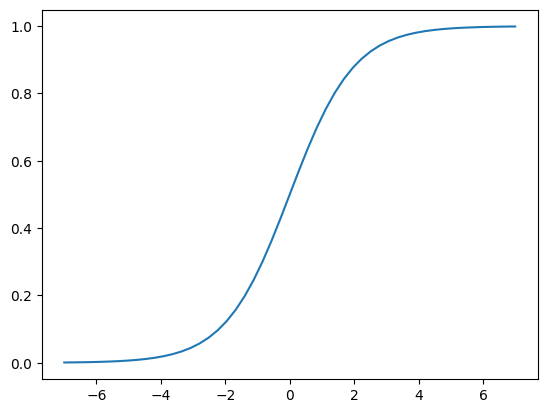

In [80]:
plt.plot(z, sigmoid(z))

In [81]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]


    return result

In [82]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

        result = sigmoid(score)
        return result

## 3.10 Training Logistic Regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
model = LogisticRegression(max_iter=2300)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2300)

In [85]:
model.intercept_[0]

np.float64(-0.045323382519725265)

In [86]:
model.coef_[0].round(3)

array([ 0.685,  0.039, -0.682,  0.056, -0.015,  0.114, -0.16 ,  0.087,
        0.039,  0.002, -0.497,  0.698, -0.16 , -0.018, -0.187,  0.066,
        0.162,  0.117, -0.16 ,  0.084,  0.285, -0.16 , -0.084, -0.161,
        0.202, -0.045,  0.086, -0.052, -0.003,  0.106, -0.011,  0.066,
       -0.025,  0.194, -0.094, -0.16 ,  0.295, -0.054, -0.16 ,  0.255,
        0.235, -0.16 , -0.034, -0.069,  0.   ])

In [87]:
model.predict_proba(X_train)

array([[0.92737411, 0.07262589],
       [0.32428383, 0.67571617],
       [0.36935502, 0.63064498],
       ...,
       [0.48795432, 0.51204568],
       [0.97453476, 0.02546524],
       [0.30652661, 0.69347339]], shape=(4225, 2))

In [88]:
y_pred = model.predict_proba(X_val)[:,1]

##### second column is the "1" value, the probability to Churn

In [89]:
churn_decision = (y_pred >= 0.5)

In [90]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [91]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [92]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [93]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [94]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [95]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

probability  prediction  actual  correct
0        0.006624           0       0     True
1        0.204823           0       0     True
2        0.217818           0       0     True
3        0.563750           1       1     True
4        0.218675           0       0     True
...           ...         ...     ...      ...
1404     0.291307           0       0     True
1405     0.041390           0       1    False
1406     0.151496           0       0     True
1407     0.788479           1       1     True
1408     0.811904           1       1     True

[1409 rows x 4 columns]

In [96]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [97]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [98]:
zip(dv.get_feature_names_out(), model.coef_[0].round(3))

In [99]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('contract=month-to-month', np.float64(0.685)),
 ('contract=one_year', np.float64(0.039)),
 ('contract=two_year', np.float64(-0.682)),
 ('dependents=no', np.float64(0.056)),
 ('dependents=yes', np.float64(-0.015)),
 ('deviceprotection=no', np.float64(0.114)),
 ('deviceprotection=no_internet_service', np.float64(-0.16)),
 ('deviceprotection=yes', np.float64(0.087)),
 ('gender=female', np.float64(0.039)),
 ('gender=male', np.float64(0.002)),
 ('internetservice=dsl', np.float64(-0.497)),
 ('internetservice=fiber_optic', np.float64(0.698)),
 ('internetservice=no', np.float64(-0.16)),
 ('monthlycharges', np.float64(-0.018)),
 ('multiplelines=no', np.float64(-0.187)),
 ('multiplelines=no_phone_service', np.float64(0.066)),
 ('multiplelines=yes', np.float64(0.162)),
 ('onlinebackup=no', np.float64(0.117)),
 ('onlinebackup=no_internet_service', np.float64(-0.16)),
 ('onlinebackup=yes', np.float64(0.084)),
 ('onlinesecurity=no', np.float64(0.285)),
 ('onlinesecurity=no_internet_service', np.fl

In [100]:
small = ['contract', 'tenure', 'monthlycharges']

In [101]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [102]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')


In [103]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [104]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [105]:
X_train_small = dv_small.transform(dicts_train_small)

In [106]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [107]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595829565)

In [108]:
w = model_small.coef_[0]
w

array([ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005])

In [109]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [110]:
-2.47+(-0.949)+(30*0.027)+(24*-0.036)

-3.473

In [111]:
sigmoid(_)

np.float64(0.030090303318277657)

## 3.12 Using the model

In [112]:
df_full_train

customerid  gender  seniorcitizen partner dependents  tenure  \
0     5442-pptjy    male              0     yes        yes      12   
1     6261-rcvns  female              0      no         no      42   
2     2176-osjuv    male              0     yes         no      71   
3     6161-erdgd    male              0     yes        yes      71   
4     2364-ufrom    male              0      no         no      30   
...          ...     ...            ...     ...        ...     ...   
5629  0781-lkxbr    male              1      no         no       9   
5630  3507-gasnp    male              0      no        yes      60   
5631  8868-wozgu    male              0      no         no      28   
5632  1251-krreg    male              0      no         no       2   
5633  5840-nvdcg  female              0     yes        yes      16   

     phoneservice multiplelines internetservice       onlinesecurity  ...  \
0             yes            no              no  no_internet_service  ...   
1             yes            no             dsl                  yes  ...   
2             yes           yes             dsl                  yes  ...   
3             yes           yes             dsl                  yes  ...   
4             yes            no             dsl                  yes  ...   
...           ...           ...             ...                  ...  ...   
5629          yes           yes     fiber_optic                   no  ...   
5630          yes            no              no  no_internet_service  ...   
5631          yes           yes     fiber_optic                   no  ...   
5632          yes           yes             dsl                   no  ...   
5633          yes            no             dsl                  yes  ...   

         deviceprotection          techsupport          streamingtv  \
0     no_internet_service  no_internet_service  no_internet_service   
1                     yes                  yes                   no   
2                      no                  yes                   no   
3                     yes                  yes                  yes   
4                      no                  yes                  yes   
...                   ...                  ...                  ...   
5629                  yes                   no                  yes   
5630  no_internet_service  no_internet_service  no_internet_service   
5631                  yes                   no                  yes   
5632                   no                   no                   no   
5633                   no                  yes                   no   

          streamingmovies        contract paperlessbilling  \
0     no_internet_service        two_year               no   
1                     yes        one_year               no   
2                      no        two_year               no   
3                     yes        one_year               no   
4                      no        one_year               no   
...                   ...             ...              ...   
5629                  yes  month-to-month              yes   
5630  no_internet_service        two_year               no   
5631                  yes  month-to-month              yes   
5632                   no  month-to-month              yes   
5633                  yes        two_year               no   

                  paymentmethod monthlycharges  totalcharges  churn  
0                  mailed_check          19.70        258.35      0  
1       credit_card_(automatic)          73.90       3160.55      1  
2     bank_transfer_(automatic)          65.15       4681.75      0  
3              electronic_check          85.45       6300.85      0  
4              electronic_check          70.40       2044.75      0  
...                         ...            ...           ...    ...  
5629           electronic_check         100.50        918.60      1  
5630               mailed_check          19.95       1189.90      0  
5631        

In [113]:
dicts_full_train = df_full_train[categorical+numerical].to_dict(orient='records')

In [114]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [115]:
y_full_train = df_full_train.churn.values

In [116]:
model = LogisticRegression(max_iter=1000)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=1000)

In [117]:
dicts_test = df_test[categorical+numerical].to_dict(orient='records')

In [118]:
X_test = dv.transform(dicts_test)

In [119]:
y_pred = model.predict_proba(X_test)[:, 1]

In [120]:
churn_decision = (y_pred >= 0.5)

In [121]:
(churn_decision == y_test).mean()

np.float64(0.8105039034776437)

In [122]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [123]:
X_customer = dv.transform([customer])

In [124]:
model.predict_proba(X_customer)[0,1]

np.float64(0.6375704661276868)